# Intro to Quantum Circuits
Before: Check that they have qiskit and qiskit-aer installed (also virtual environments)


## Review: Qubit Gates and what they do

$X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \quad \ket{0}\to\ket{1} \quad \ket{1}\to\ket{0}$  (bit-flip)  
$Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \quad \ket{0}\to i\ket{1} \quad \ket{1}\to -i\ket{0}$    (phase & bit-flip)  
$Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \quad \ket{0}\to\ket{0} \quad \ket{1}\to -\ket{1}$   (phase-flip)  
$H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \quad \ket{0}\to \frac{1}{\sqrt{2}}(\ket{0}+\ket{1})
\quad \ket{1}\to \frac{1}{\sqrt{2}}(\ket{0}-\ket{1})$   (superposition)  

In [1]:
# Make sure qiskit is installed
import qiskit

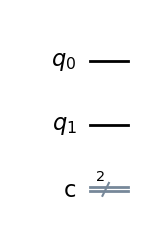

In [2]:
# Quantum Circuit Diagram: How to read??

from qiskit import QuantumCircuit

qc = QuantumCircuit(2,2)

qc.draw('mpl')

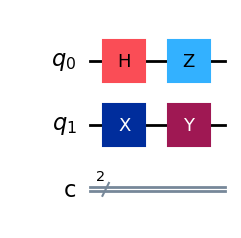

In [3]:
# Apply 1-qubit gates

qc.h(0)

qc.z(0)

qc.x(1)

qc.y(1)

qc.draw('mpl')

In [4]:
# Why 'mpl'?

qc.draw()

┌───┐┌───┐
q_0: ┤ H ├┤ Z ├
     ├───┤├───┤
q_1: ┤ X ├┤ Y ├
     └───┘└───┘
c: 2/══════════

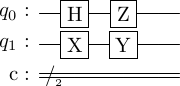

In [5]:
qc.draw('latex')

## Measure
Also go over Jupyter Notebook's storing variables here -- run cell multiple times

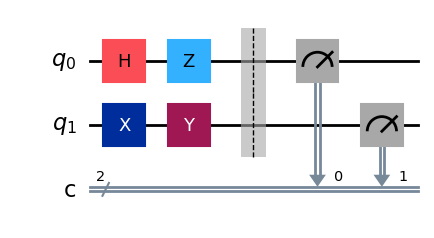

In [6]:
qc.barrier()

qc.measure(0,0)
qc.measure(1,1)

qc.draw('mpl')

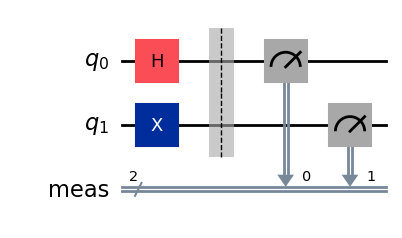

In [7]:
# Usually good to define circuit within one block
qc = QuantumCircuit(2) # Note no classical bits needed in definition

qc.h(0)
qc.x(1)
qc.measure_all()

qc.draw('mpl')

## Aer Simulator

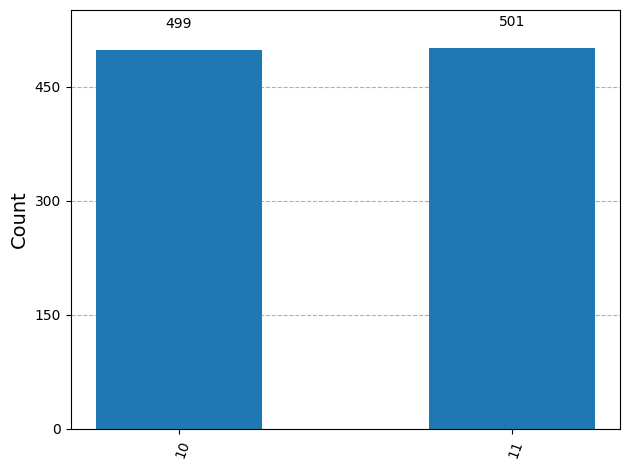

In [8]:
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

sim = AerSimulator()
job = transpile(qc, sim)
result = sim.run(job, shots=1000).result()
counts = result.get_counts(qc)

plot_histogram(counts)

## CNOT gate

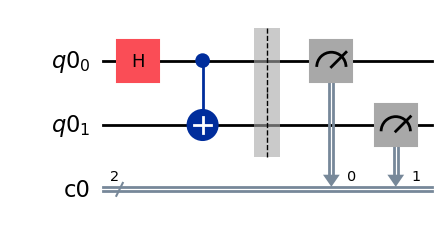

In [13]:
# Also show another way to safely create quantum circuits -- more modular
from qiskit.circuit import QuantumRegister, ClassicalRegister

def create_circuit():
    qubits = QuantumRegister(2)
    clbits = ClassicalRegister(2)

    qc = QuantumCircuit(qubits, clbits)
    (q0, q1) = qubits
    (c0, c1) = clbits

    qc.h(q0)
    qc.cx(q0, q1)

    qc.barrier()

    qc.measure(q0,c0)
    qc.measure(q1,c1)

    return qc

qc = create_circuit()

qc.draw('mpl')
    

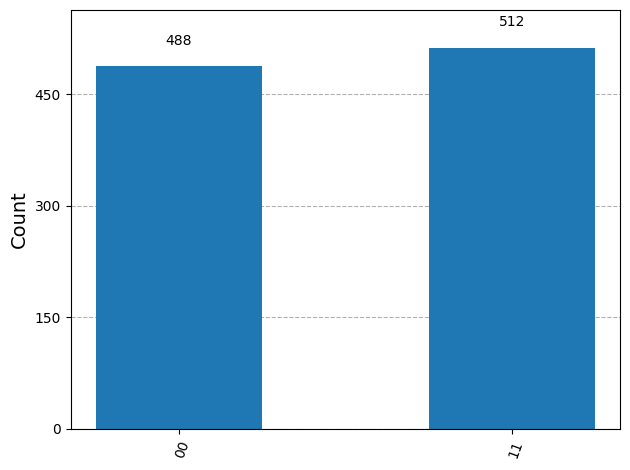

In [15]:
job = transpile(qc, sim)
result = sim.run(job, shots=1000).result()
counts = result.get_counts(qc)

plot_histogram(counts)

## Defining Pauli Operators

XZ


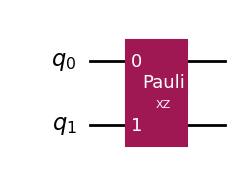

In [17]:
import qiskit.quantum_info as qi

# Method 1: Create Pauli operator from string
pauli = qi.Pauli('XZ') #'XZ' = X on qubit 1, Z on qubit 0 (little-endian)
#Note: Can also create from another Pauli object, ScalarOp, or QuantumCircuit with only Pauli gates (copy constructor).

print(pauli)

qc = QuantumCircuit(2)

qc.append(pauli.to_instruction(), [0,1])

qc.draw('mpl')


Idea: Have them check whether X is on q1 or q0 by coding their own circuits

In [20]:
# Method 2: Create from matrix (Z-gate, X-gate)

# Basis: (Z [q0, q1], X [q0, q1])
pauli = qi.Pauli(([0, 1], [0, 1])) # We apply Z & X = Y on qubit 1, nothing on qubit 0, thus the string 'YI'.

print(pauli)

YI


If time permits, run on actual hardware (create IBM Cloud account & save API key)  

Also histogram options